Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [89]:
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine

In [ ]:
# Read CSV files into dataframes
df1 = pd.read_csv('../data/foursquare_results.csv')
df2 = pd.read_csv('../data/yelp_results.csv')

In [51]:
df1.head()

,query_latitude,query_longitude,num_categories,name,distance,fsqid,num_attributes
0,43.685924,-79.376304,1,Rosedale's Finest,27,5f6f6dc999b0676341c2edd0,0
1,43.685924,-79.376304,3,Dolce Bakery,38,5f710453c2dbe370d739275e,0
2,43.685924,-79.376304,1,Kirkwood's Rib Joint,876,4c005620ad46c9b6e9568f66,0
3,43.685924,-79.376304,1,Picnic Cafe & Wine Shop,897,645fd57a10a5633876bb2c8f,0
4,43.685924,-79.376304,3,Holly Berry Fair,381,396cd48d15ba4cac949057c4,0


In [52]:
print(df1.shape)

(2194, 7)


In [66]:
len(df1)-len(df1.drop_duplicates())

0

In [53]:
df2.head()

,query_latitude,query_longitude,num_categories,name,distance,num_attributes
0,43.685924,-79.376304,1,megumi-mazesoba-toronto,1302.485544,0
1,43.685924,-79.376304,3,mineral-toronto,1402.327352,0
2,43.685924,-79.376304,1,ryus-noodle-bar-toronto-7,1701.034869,1
3,43.685924,-79.376304,1,black-camel-toronto-2,1426.509564,0
4,43.685924,-79.376304,3,dolce-bakery-toronto,25.650316,1


In [37]:
print(df2.shape)

(2458, 7)


In [28]:
print(df1.dtypes)

query_latitude     float64
query_longitude    float64
num_categories       int64
name                object
distance             int64
fsqid               object
num_attributes       int64
dtype: object


In [31]:
print(df2.dtypes)

query_latitude     float64
query_longitude    float64
num_categories       int64
name                object
distance             int64
num_attributes       int64
dtype: object


In [65]:
len(df2)-len(df2.drop_duplicates())

0

In [30]:
df2['distance'] = df2['distance'].astype(int)

In [54]:
df1 = df1.drop(columns = 'fsqid')
df1['source'] = 'foursquare'
df2['source'] = 'yelp'

In [55]:
poidata = pd.concat([df1, df2])
print(poidata)

      query_latitude  query_longitude  num_categories  \
0          43.685924       -79.376304               1   
1          43.685924       -79.376304               3   
2          43.685924       -79.376304               1   
3          43.685924       -79.376304               1   
4          43.685924       -79.376304               3   
...              ...              ...             ...   
2453       43.649192       -79.383632               1   
2454       43.649192       -79.383632               2   
2455       43.649192       -79.383632               3   
2456       43.649192       -79.383632               1   
2457       43.649192       -79.383632               2   

                                  name     distance  num_attributes  \
0                    Rosedale's Finest    27.000000               0   
1                         Dolce Bakery    38.000000               0   
2                 Kirkwood's Rib Joint   876.000000               0   
3              Picnic Cafe & Wi

In [63]:
poidata.duplicated()
len(poidata)-len(poidata.drop_duplicates())

0

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [56]:
groupedpoi = poidata.groupby(['query_longitude', 'query_latitude', 'source']).agg({
    'distance': 'mean',
    'name': 'count',
    'num_attributes': 'mean',
    'num_categories': 'mean'
})

print(groupedpoi)


                                              distance  name  num_attributes  \
query_longitude query_latitude source                                          
-79.503016      43.662540      foursquare   660.266667    15           0.000   
                               yelp        1192.041572    50           0.440   
-79.500500      43.774100      foursquare   425.480000    50           0.000   
                               yelp         599.928497    50           0.580   
-79.500027      43.760740      foursquare   766.826087    46           0.000   
...                                                ...   ...             ...   
-79.229204      43.726902      yelp        1159.456088    50           0.480   
-79.209707      43.745311      foursquare   675.485714    35           0.000   
                               yelp         975.419987    50           0.400   
-79.130120      43.780550      foursquare   647.500000     6           0.000   
                               yelp     

In [ ]:
poidata.groupby(['query_longitude', 'query_latitude', 'source'])['distance'].describe()

In [80]:
poidata.groupby(['query_longitude', 'query_latitude', 'source'])['num_attributes'].describe()

count   mean       std  min  25%  \
query_longitude query_latitude source                                         
-79.503016      43.662540      foursquare   15.0  0.000  0.000000  0.0  0.0   
                               yelp         50.0  0.440  0.577115  0.0  0.0   
-79.500500      43.774100      foursquare   50.0  0.000  0.000000  0.0  0.0   
                               yelp         50.0  0.580  0.498569  0.0  0.0   
-79.500027      43.760740      foursquare   46.0  0.000  0.000000  0.0  0.0   
...                                          ...    ...       ...  ...  ...   
-79.229204      43.726902      yelp         50.0  0.480  0.504672  0.0  0.0   
-79.209707      43.745311      foursquare   35.0  0.000  0.000000  0.0  0.0   
                               yelp         50.0  0.400  0.494872  0.0  0.0   
-79.130120      43.780550      foursquare    6.0  0.000  0.000000  0.0  0.0   
                               yelp          8.0  0.375  0.517549  0.0  0.0   

                                           50%  75%  max  
query_longitude query_latitude source                     
-79.503016      43.662540      foursquare  0.0  0.0  0.0  
                               yelp        0.0  1.0  2.0  
-79.500500      43.774100      foursquare  0.0  0.0  0.0  
                               yelp        1.0  1.0  1.0  
-79.500027      43.760740      foursquare  0.0  0.0  0.0  
...                                        ...  ...  ...  
-79.229204      43.726902      yelp        0.0  1.0  1.0  
-79.209707      43.745311      foursquare  0.0  0.0  0.0  
                               yelp        0.0  1.0  1.0  
-79.130120      43.780550      foursquare  0.0  0.0  0.0  
                               yelp        0.0  1.0  1.0  

[100 rows x 8 columns]

In [81]:
poidata.groupby(['query_longitude', 'query_latitude', 'source'])['num_categories'].describe()

count      mean       std  min  \
query_longitude query_latitude source                                       
-79.503016      43.662540      foursquare   15.0  1.600000  0.632456  1.0   
                               yelp         50.0  2.000000  0.903508  1.0   
-79.500500      43.774100      foursquare   50.0  1.660000  0.717422  1.0   
                               yelp         50.0  1.800000  0.880631  1.0   
-79.500027      43.760740      foursquare   46.0  1.565217  0.749879  1.0   
...                                          ...       ...       ...  ...   
-79.229204      43.726902      yelp         50.0  2.040000  0.946745  1.0   
-79.209707      43.745311      foursquare   35.0  1.571429  0.777844  1.0   
                               yelp         50.0  1.940000  0.866850  1.0   
-79.130120      43.780550      foursquare    6.0  1.500000  0.547723  1.0   
                               yelp          8.0  1.625000  0.916125  1.0   

                                           25%  50%   75%  max  
query_longitude query_latitude source                           
-79.503016      43.662540      foursquare  1.0  2.0  2.00  3.0  
                               yelp        1.0  2.0  3.00  4.0  
-79.500500      43.774100      foursquare  1.0  2.0  2.00  3.0  
                               yelp        1.0  1.5  3.00  3.0  
-79.500027      43.760740      foursquare  1.0  1.0  2.00  3.0  
...                                        ...  ...   ...  ...  
-79.229204      43.726902      yelp        1.0  2.0  3.00  3.0  
-79.209707      43.745311      foursquare  1.0  1.0  2.00  3.0  
                               yelp        1.0  2.0  3.00  3.0  
-79.130120      43.780550      foursquare  1.0  1.5  2.00  2.0  
                               yelp        1.0  1.0  2.25  3.0  

[100 rows x 8 columns]

In [71]:
poidata.groupby(['query_longitude', 'query_latitude', 'source'])['name'].describe()

count unique  \
query_longitude query_latitude source                    
-79.503016      43.662540      foursquare    15     13   
                               yelp          50     50   
-79.500500      43.774100      foursquare    50     49   
                               yelp          50     50   
-79.500027      43.760740      foursquare    46     44   
...                                         ...    ...   
-79.229204      43.726902      yelp          50     50   
-79.209707      43.745311      foursquare    35     33   
                               yelp          50     50   
-79.130120      43.780550      foursquare     6      6   
                               yelp           8      8   

                                                                                        top  \
query_longitude query_latitude source                                                         
-79.503016      43.662540      foursquare                                         Ma Maison   
                               yelp                                           campo-toronto   
-79.500500      43.774100      foursquare                                            Subway   
                               yelp                               suliko-restaurant-concord   
-79.500027      43.760740      foursquare                                       Tim Hortons   
...                                                                                     ...   
-79.229204      43.726902      yelp                                   il-fresco-scarborough   
-79.209707      43.745311      foursquare                                       Tim Hortons   
                               yelp        the-olde-stone-cottage-pub-and-patio-scarborough   
-79.130120      43.780550      foursquare                                Mr Beans Coffee Co   
                               yelp                                 azumi-sushi-scarborough   

                                          freq  
query_longitude query_latitude source           
-79.503016      43.662540      foursquare    2  
                               yelp          1  
-79.500500      43.774100      foursquare    2  
                               yelp          1  
-79.500027      43.760740      foursquare    2  
...                                        ...  
-79.229204      43.726902      yelp          1  
-79.209707      43.745311      foursquare    3  
                               yelp          1  
-79.130120      43.780550      foursquare    1  
                               yelp          1  

[100 rows x 4 columns]

<Axes: xlabel='distance', ylabel='Count'>

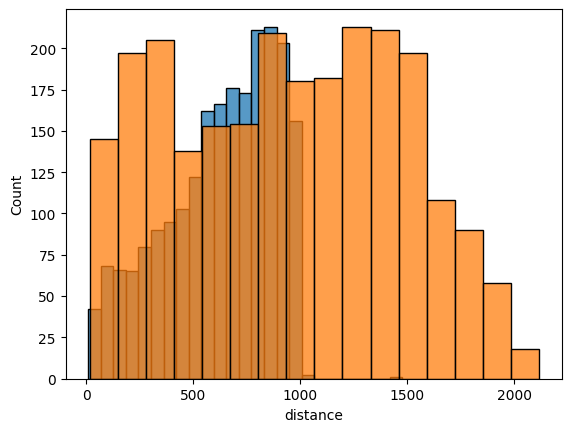

In [76]:
sns.histplot(df1['distance'])
sns.histplot(df2['distance']) # Yelp radius was set to 1000--distance could mean travel distance along routes

<Axes: xlabel='num_categories', ylabel='Count'>

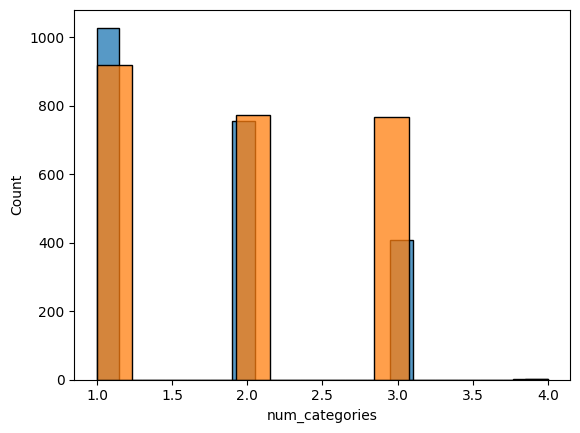

In [77]:
sns.histplot(df1['num_categories'])
sns.histplot(df2['num_categories'])

<Axes: xlabel='num_attributes', ylabel='Count'>

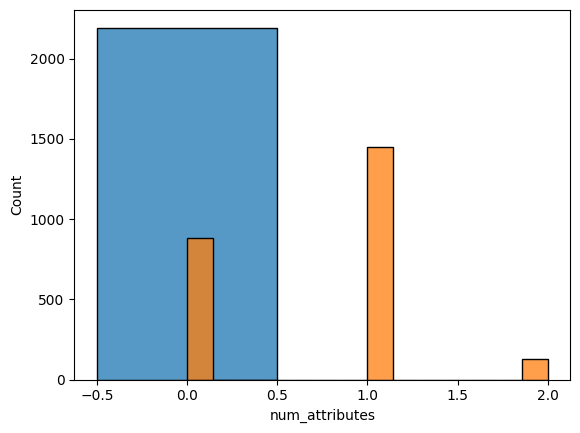

In [78]:
sns.histplot(df1['num_attributes'])
sns.histplot(df2['num_attributes'])

In [83]:
df1.sort_values("num_attributes").head()

,query_latitude,query_longitude,num_categories,name,distance,num_attributes,source
0,43.685924,-79.376304,1,Rosedale's Finest,27,0,foursquare
1471,43.690564,-79.326319,1,Abugida Restaurant & Lounge,919,0,foursquare
1470,43.690564,-79.326319,2,The Wood Owl,899,0,foursquare
1469,43.690564,-79.326319,1,The Rib House,893,0,foursquare
1468,43.690564,-79.326319,3,Djerba la Douce,874,0,foursquare


<Axes: xlabel='name', ylabel='Count'>

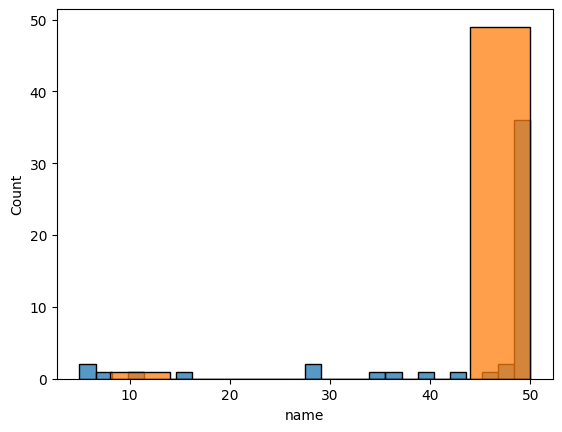

In [88]:
sns.histplot(df1.groupby(['query_longitude', 'query_latitude', 'source'])['name'].count())
sns.histplot(df2.groupby(['query_longitude', 'query_latitude', 'source'])['name'].count())

The initial pattern I see between Yelp and Foursquare is that Yelp has more rich data. They provide more specific breakdowns of pois by categories (Foursquare often provides more pois with only one category label). Additionally, the number of attributes/features provided by Yelp were often 1-2, but Foursquare did not provide any features in the dataset. Overall, Yelp maxed out at 50 pois per request (maximum allowed was 50), whereas Foursquare was not able to offer 50 pois for many requests at the same lat/long coordinates. Of note, for the Yelp data I indicated a maximum radius of 1000 meters, but the data indicates a distance up to 2000 meters. While I initially thought that the Yelp API may have not abided to my radius limits, I suspect that the Yelp distance is calculated based on travel distance along set paths but the Foursqaure distance seems to be calculated based on straight paths between the lat/long of the query and poi. This may create some difficulty when assessing the relationship between average poi distance and number of free bikes in the model.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [92]:
engine = create_engine('sqlite:///../data/bike_station_pois.db')

# Specify the table name and database engine
table_name = 'joined_pois'
# Export the DataFrame to the SQLite database
poidata.to_sql(table_name, engine, if_exists='replace', index=False)

table_name = 'bike_stations'

bs = pd.read_csv('../data/bike_stations.csv')

bs.to_sql(table_name, engine, if_exists='replace', index=False)


877

Look at the data before and after the join to validate your data.

Please see above for validation for shape, duplicates, etc. 